<a href="https://colab.research.google.com/github/pathilink/flash_case/blob/main/notebook/flash_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FE2B8E>Technical Analytics Case - Flash</font>

## Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.precision', 2) # decimal
# pd.set_option('float_format', '{:.2f}'.format) # scientific notation

## Data

In [ ]:
# import the google.colab module
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cards_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards.csv')
status_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards_status.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/test/flash/data_raw/cards_transactions.csv')

## EDA

### cards_df

In [ ]:
cards_df.sample(5)

,card_number,card_model,company_id,employee_id,valid_thru
256024,636746895,CONTACTLESS,61967082ee3b9a0009137eef,61e57d97a72b44893f1727bf,06/25
138463,234166590,CONTACTLESS,623246630087f9bd529b11a5,62325ee5bbecf94eb67ac936,02/24
31694,237056400,CONTACTLESS,61a7c2d7b7569a000838df64,6304b5866ea56ff2be1f11a1,03/24
76138,557498145,CONTACTLESS,633c3608ef418debe3ab3fe1,6365412c77f6717b916647d3,10/24
136616,185963520,PIN,5f6e2d6194d53c0008f835fd,613bbeaeccb6cb0009f590cb,08/23


In [ ]:
print(f'cards_df has {cards_df.shape[0]} rows and {cards_df.shape[1]} columns.')

cards_df has 288093 rows and 5 columns.


In [ ]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288093 entries, 0 to 288092
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   card_number  288093 non-null  int64 
 1   card_model   288093 non-null  object
 2   company_id   287987 non-null  object
 3   employee_id  288018 non-null  object
 4   valid_thru   288093 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.0+ MB


In [ ]:
# missing data
total = cards_df.isnull().sum().sort_values(ascending=False)
percent = (cards_df.isnull().sum()/cards_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.query('Total > 0')

,Total,Percentage
company_id,106,0.000368
employee_id,75,0.000260


In [ ]:
# unique values
cards_df['card_model'].unique()

array(['PIN', 'CONTACTLESS'], dtype=object)

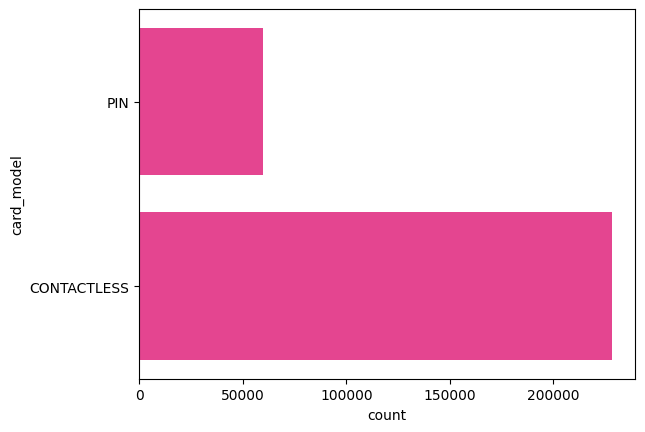

In [ ]:
# card model distribution
sns.countplot(data=cards_df, y='card_model', color='#FE2B8E')

plt.show()

In [ ]:
# card distribution by company_id
cards_df.groupby(['company_id','card_model'])['card_number'].count().reset_index().sort_values(by='card_number', ascending=False)


,company_id,card_model,card_number
7846,613bb466a9517c00099d37c2,CONTACTLESS,1469
13003,622a549c256d4b7922337eeb,CONTACTLESS,1464
10365,61b89cf2c3868a4e89c654fc,CONTACTLESS,1041
13075,622f86082d1718b02e8efd3f,CONTACTLESS,995
12431,6213c84acab8cf0bf2d4e87b,CONTACTLESS,875
...,...,...,...
11917,6203b853f09840a353a046a1,PIN,1
22755,63ea49ab26f5c45ebe18b4e4,CONTACTLESS,1
22754,63ea429d6f7cb79cd6149cec,CONTACTLESS,1
22751,63ea26ecd6571fc568f7b04b,CONTACTLESS,1


In [ ]:
# change card_number type
cards_df['card_number'] = cards_df['card_number'].astype(str)
type(cards_df['card_number'][0])

str

In [ ]:
# change format
cards_df['valid_thru'] = cards_df['valid_thru'].apply(lambda x: f'01-{x.replace("/", "-20")}')

# change type
cards_df['valid_thru'] = pd.to_datetime(cards_df['valid_thru'], format='%d-%m-%Y')

cards_df['valid_thru'].head()


,valid_thru
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01
4,2023-01-01


In [ ]:
# min & max: dates
print(f"Minimum valid date: {cards_df['valid_thru'].min()}")
print(f"Maximum valid date: {cards_df['valid_thru'].max()}")

Minimum valid date: 2021-04-01 00:00:00
Maximum valid date: 2025-09-01 00:00:00


In [ ]:
# quarter column
cards_df['period'] = 'Q' + (cards_df['valid_thru'].dt.quarter.astype(str)) + '-' + cards_df['valid_thru'].dt.year.astype(str)
cards_df[['valid_thru', 'period']].sample(5)

,valid_thru,period
89305,2024-08-01,Q3-2024
60781,2025-02-01,Q1-2025
186862,2025-01-01,Q1-2025
53232,2025-07-01,Q3-2025
256303,2025-07-01,Q3-2025


### status_df

In [ ]:
status_df.sample(5)

,card_number,card_model,card_type,card_status,started_at,ended_at
149732,596755995,CONTACTLESS,PLASTIC,TEMPORARILY_BLOCKED,2023-06-08,2023-06-08
110692,607109535,CONTACTLESS,PLASTIC,OPEN,2023-05-05,NaN
163769,189810270,PIN,PLASTIC,OPEN,2022-11-30,NaN
370146,251099445,CONTACTLESS,PLASTIC,OPEN,2022-12-13,2023-02-08
260299,522348045,CONTACTLESS,PLASTIC,OPEN,2022-10-28,NaN


In [ ]:
print(f'status_df has {status_df.shape[0]} rows and {status_df.shape[1]} columns.')

status_df has 498219 rows and 6 columns.


In [ ]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498219 entries, 0 to 498218
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   card_number  498219 non-null  int64 
 1   card_model   498219 non-null  object
 2   card_type    498219 non-null  object
 3   card_status  498219 non-null  object
 4   started_at   498219 non-null  object
 5   ended_at     210126 non-null  object
dtypes: int64(1), object(5)
memory usage: 22.8+ MB


In [ ]:
status_df['card_model'].unique()

array(['PIN', 'CONTACTLESS'], dtype=object)

In [ ]:
status_df['card_type'].unique()

array(['PLASTIC'], dtype=object)

In [ ]:
# drop column
status_df = status_df.drop('card_type', axis=1)
status_df.columns

Index(['card_number', 'card_model', 'card_status', 'started_at', 'ended_at'], dtype='object')

In [ ]:
status_df['card_status'].unique()

array(['OPEN', 'PERMANENTLY_TERMINATED', 'TEMPORARILY_BLOCKED'],
      dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


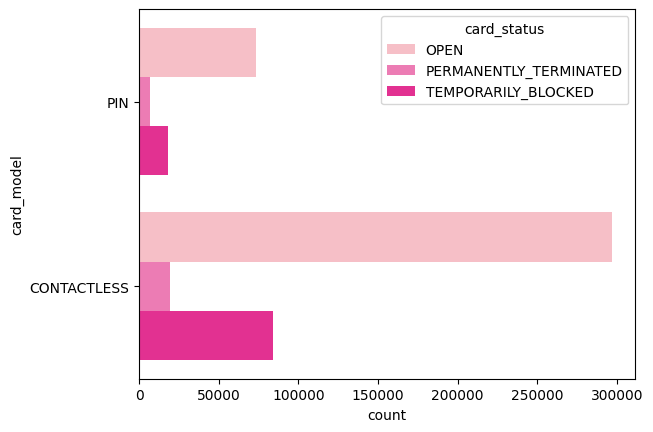

In [ ]:
# card_model x card_status: is it related?
pink_palette = sns.color_palette(["#FFB6C1", "#FF69B4", "#FF1493"])

sns.countplot(data=status_df, y='card_model', hue='card_status', palette=pink_palette);

In [ ]:
# change dates type

status_df['started_at'] = pd.to_datetime(status_df['started_at'])
status_df['ended_at'] = pd.to_datetime(status_df['ended_at'])
status_df['started_at'].head()

,started_at
0,2022-07-25
1,2022-05-02
2,2022-05-27
3,2023-03-03
4,2022-12-14


In [ ]:
status_df['ended_at'].sample(5)

,ended_at
378402,NaT
454161,2023-04-05
493707,2023-05-15
440256,NaT
388048,2023-07-26


In [ ]:
# min & max: dates
print(f"Minimum start date: {status_df['started_at'].min()}")
print(f"Maximum start date: {status_df['started_at'].max()}")

print(f"Minimum end date: {status_df['ended_at'].min()}")
print(f"Maximum end date: {status_df['ended_at'].max()}")

Minimum start date: 2022-02-28 00:00:00
Maximum start date: 2023-10-11 00:00:00
Minimum end date: 2022-08-06 00:00:00
Maximum end date: 2023-10-11 00:00:00


In [ ]:
# quarter column
status_df['period_started_at'] = 'Q' + (status_df['started_at'].dt.quarter.astype(str)) + '-' + status_df['started_at'].dt.year.astype(str)
status_df[['started_at', 'period_started_at']].sample(5)

,started_at,period_started_at
74294,2023-07-10,Q3-2023
285971,2023-09-10,Q3-2023
197468,2023-09-09,Q3-2023
296453,2023-04-07,Q2-2023
297191,2023-05-15,Q2-2023


In [ ]:
status_df['period_ended_at'] = (
    'Q' + status_df['ended_at'].dt.quarter.fillna(0).astype(int).astype(str) + '-' +
    status_df['ended_at'].dt.year.fillna(0).astype(int).astype(str)
).where(status_df['ended_at'].notna(), other=None)

status_df[['ended_at', 'period_ended_at']].sample(5)

,ended_at,period_ended_at
122478,NaT,None
29693,2023-10-01,Q4-2023
332283,NaT,None
270690,2023-09-03,Q3-2023
265039,NaT,None


In [ ]:
type(status_df['period_ended_at'][27460])

str

### transactions_df

In [ ]:
transactions_df.sample(5)

,card_number,transaction_id,transaction_date,amount
10074332,188655045.0,Fkd_9eqQDFHCz9-JzzLfx,2023-04-03T18:43:45.000Z,94.11
13605985,578516235.0,pE-Xoqx6pxDbPlN1XOgQD,2023-07-24T05:25:50.000Z,2.00
2564908,254747355.0,oVkLUXwAOCBc2h85Dmlaw,2023-10-15T23:20:18.000Z,62.00
10485319,523750260.0,tXYq0cO6JSKxaFl-XQ93j,2023-09-27T13:20:35.000Z,39.10
9437172,584432955.0,YYNE2b-dlrlPXMoAiE3Jn,2023-05-29T15:39:44.000Z,35.66


In [ ]:
print(f'transactions_df has {transactions_df.shape[0]} rows and {transactions_df.shape[1]} columns.')

transactions_df has 13979889 rows and 4 columns.


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979889 entries, 0 to 13979888
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   card_number       float64
 1   transaction_id    object 
 2   transaction_date  object 
 3   amount            float64
dtypes: float64(2), object(2)
memory usage: 426.6+ MB


In [ ]:
# missing data
total = transactions_df.isnull().sum().sort_values(ascending=False)
percent = (transactions_df.isnull().sum()/transactions_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data#.query('Total > 0')

,Total,Percentage
card_number,0,0.0
transaction_id,0,0.0
transaction_date,0,0.0
amount,0,0.0


In [ ]:
# change card_number type
transactions_df['card_number'] = transactions_df['card_number'].astype(str).str.replace('.0', '', regex=False)
type(transactions_df['card_number'][0])

str

In [ ]:
# change date type
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['transaction_date'].dtypes

datetime64[ns, UTC]

In [ ]:
# min & max: dates
print(f"Minimum date: {transactions_df['transaction_date'].min()}")
print(f"Maximum date: {transactions_df['transaction_date'].max()}")

Minimum date: 2022-06-02 13:05:56+00:00
Maximum date: 2023-10-20 06:54:54+00:00


In [ ]:
# quarter column
transactions_df['period'] = 'Q' + (transactions_df['transaction_date'].dt.quarter.astype(str)) + '-' + transactions_df['transaction_date'].dt.year.astype(str)
transactions_df[['transaction_date', 'period']].sample(5)

,transaction_date,period
7341150,2023-03-18 11:12:28+00:00,Q1-2023
623591,2023-06-07 12:23:18+00:00,Q2-2023
13429190,2023-08-01 12:44:30+00:00,Q3-2023
8294548,2022-12-05 16:43:04+00:00,Q4-2022
5546143,2023-05-18 12:07:33+00:00,Q2-2023


In [ ]:
transactions_df['period'].unique()

array(['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023', 'Q3-2022', 'Q4-2022',
       'Q2-2022'], dtype=object)

## Questions

### 1.1 Cards at beginning of quarter

In [ ]:
# TOTAL
## Q1-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                  started_at <= '2022-12-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

126807

In [ ]:
# OPEN
## Q1-2023
status_df.query("card_status == 'OPEN' & \
                  started_at <= '2022-12-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

126171

In [ ]:
# TEMPORARILY_BLOCKED
## Q1-2023
status_df.query("card_status == 'TEMPORARILY_BLOCKED' & \
                  started_at <= '2022-12-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

636

In [ ]:
# TOTAL
## Q2-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                  started_at <= '2023-03-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

159164

In [ ]:
# OPEN
## Q2-2023
status_df.query("card_status == 'OPEN' & \
                  started_at <= '2023-03-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

155169

In [ ]:
# TEMPORARILY_BLOCKED
## Q2-2023
status_df.query("card_status == 'TEMPORARILY_BLOCKED' & \
                  started_at <= '2023-03-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

3995

In [ ]:
# TOTAL
## Q3-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                  started_at <= '2023-06-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

200428

In [ ]:
# OPEN
## Q3-2023
status_df.query("card_status == 'OPEN' & \
                  started_at <= '2023-06-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

196074

In [ ]:
# TEMPORARILY_BLOCKED
## Q3-2023
status_df.query("card_status == 'TEMPORARILY_BLOCKED' & \
                  started_at <= '2023-06-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

4354

### 1.2 New cards obtained during quarter

In [ ]:
# TOTAL
## Q1-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                 (started_at >= '2023-01-01' & started_at <= '2023-03-31') & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

32357

In [ ]:
# TOTAL
## Q2-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                 (started_at >= '2023-04-01' & started_at <= '2023-06-30') & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

41264

In [ ]:
# TOTAL
## Q3-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                 (started_at >= '2023-07-01' & started_at <= '2023-09-30') & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

53174

### 1.3 Cards terminated during quarter

In [ ]:
# TOTAL
## Q1-2023
status_df.query("card_status == 'PERMANENTLY_TERMINATED' & \
                 period_started_at == 'Q1-2023' \
                  ")['card_number'].nunique()

4686

In [ ]:
# TOTAL
## Q2-2023
status_df.query("card_status == 'PERMANENTLY_TERMINATED' & \
                 period_started_at == 'Q2-2023' \
                  ")['card_number'].nunique()

8687

In [ ]:
# TOTAL
## Q3-2023
status_df.query("card_status == 'PERMANENTLY_TERMINATED' & \
                 period_started_at == 'Q3-2023' \
                  ")['card_number'].nunique()

11061

### 1.4 Cards at end of quarter

In [ ]:
# TOTAL
## Q1-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                  started_at <= '2023-03-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

159164

In [ ]:
# OPEN
## Q1-2023
status_df.query("card_status == 'OPEN' & \
                  started_at <= '2023-03-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

155169

In [ ]:
# TEMPORARILY_BLOCKED
## Q1-2023
status_df.query("card_status == 'TEMPORARILY_BLOCKED' & \
                  started_at <= '2023-03-31' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

3995

In [ ]:
# TOTAL
## Q2-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                  started_at <= '2023-06-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

200428

In [ ]:
# OPEN
## Q2-2023
status_df.query("card_status == 'OPEN' & \
                  started_at <= '2023-06-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

196074

In [ ]:
# TEMPORARILY_BLOCKED
## Q2-2023
status_df.query("card_status == 'TEMPORARILY_BLOCKED' & \
                  started_at <= '2023-06-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

4354

In [ ]:
# TOTAL
## Q3-2023
status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                  started_at <= '2023-09-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

253602

In [ ]:
# OPEN
## Q3-2023
status_df.query("card_status == 'OPEN' & \
                  started_at <= '2023-09-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

248322

In [ ]:
# TEMPORARILY_BLOCKED
## Q3-2023
status_df.query("card_status == 'TEMPORARILY_BLOCKED' & \
                  started_at <= '2023-09-30' & \
                  ended_at.isnull() \
                  ")['card_number'].nunique()

5280

### 1.5 Cards with at least one transaction during quarter

In [ ]:
type(transactions_df['card_number'][1])

str

In [ ]:
# TOTAL
## Q1-2023
transactions_df.query("period == 'Q1-2023'")['card_number'].nunique()

128113

In [ ]:
# TOTAL
## Q2-2023
transactions_df.query("period == 'Q2-2023'")['card_number'].nunique()

155331

In [ ]:
# TOTAL
## Q3-2023
transactions_df.query("period == 'Q3-2023'")['card_number'].nunique()

174052

### 2.1 Percentage of contactless cards out of the total number of cards at the end of Q3-2023.

In [ ]:
# active cards until Q3-2023
active_q3 = status_df.query("(card_status == 'OPEN' | card_status == 'TEMPORARILY_BLOCKED') & \
                              started_at <= '2023-09-30' \
                            ")['card_number']
active_q3.sample(5)

,card_number
450738,264318420
31578,608603400
465920,587951925
183172,552561495
476058,653892735


In [ ]:
q2_1 = pd.merge(status_df, active_q3, on='card_number', how='inner')
q2_1.head()

,card_number,card_model,card_status,started_at,ended_at,period_started_at,period_ended_at
0,150152835,PIN,OPEN,2022-07-25,NaT,Q3-2022,None
1,150162990,PIN,OPEN,2022-05-02,NaT,Q2-2022,None
2,150167805,PIN,OPEN,2022-05-27,NaT,Q2-2022,None
3,150203565,PIN,PERMANENTLY_TERMINATED,2023-03-03,NaT,Q1-2023,None
4,150203565,PIN,OPEN,2022-12-14,2023-03-03,Q4-2022,Q1-2023


In [ ]:
# calculating 'card_model' percentual
percentual = q2_1['card_model'].value_counts(normalize=True) * 100

# df
percentual_df = percentual.reset_index().round()
percentual_df.columns = ['card_model', 'percentual']

percentual_df

,card_model,percentual
0,CONTACTLESS,83.0
1,PIN,17.0


### 2.2 Strategies to increase the contactless card rate by the end of Q4-2023.

In [ ]:
sort_periods = ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023',
                  'Q1-2024', 'Q2-2024', 'Q3-2024', 'Q4-2024',
                  'Q1-2025', 'Q2-2025', 'Q3-2025']

q2_2 = cards_df.query("period in @sort_periods") \
                      .groupby(['period', 'card_model'])['card_number'].count() \
                      .reset_index()

q2_2['period_order'] = q2_2['period'].apply(lambda x: sort_periods.index(x))

q2_2 = q2_2.sort_values(by='period_order').drop(columns='period_order')

q2_2

,period,card_model,card_number
0,Q1-2023,PIN,5989
4,Q2-2023,PIN,9363
8,Q3-2023,PIN,10104
11,Q4-2023,PIN,25267
1,Q1-2024,CONTACTLESS,29031
2,Q1-2024,PIN,2
5,Q2-2024,CONTACTLESS,51982
6,Q2-2024,PIN,5
9,Q3-2024,CONTACTLESS,16182
12,Q4-2024,CONTACTLESS,32782


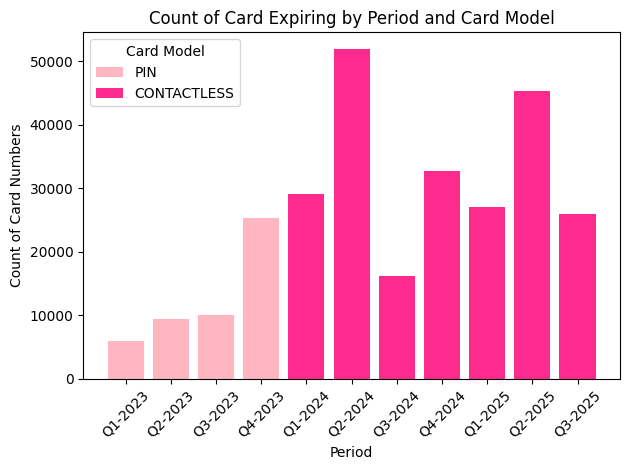

In [ ]:
colors = ['#FFB6C1', '#FE2B8E']  # 'PIN', 'CONTACTLESS'

for model in q2_2['card_model'].unique():
    subset = q2_2[q2_2['card_model'] == model]
    plt.bar(subset['period'], subset['card_number'], label=model, color=colors.pop(0))

plt.xlabel('Period')
plt.ylabel('Count of Card Numbers')
plt.title('Count of Card Expiring by Period and Card Model')
plt.xticks(rotation=45)
plt.legend(title='Card Model')
plt.tight_layout()

plt.show()

🎯 Stop issuing PIN cards.

🎯 Almost 100% of PIN cards will expire by the end of Q4-2023. It will be possible to eliminate PIN cards by not issuing new cards in this model and encouraging the switch to CONTACTLESS.

### 3.1 How to improve card activation and use

In [ ]:
# new df
q3_1 = status_df.query("card_status == 'TEMPORARILY_BLOCKED'").copy()

# differency between ended_at and started_at in days
q3_1.loc[:,'duration'] = (q3_1['ended_at'] - q3_1['started_at']).dt.days

# card_abandoned: >= 90 days with status 'TEMPORARILY_BLOCKED'
q3_1.loc[:,'card_abandoned'] = np.where(q3_1['duration'] >= 90, '1', '0')
q3_1.sample(5)

,card_number,card_model,card_status,started_at,ended_at,period_started_at,period_ended_at,duration,card_abandoned
377306,304992810,CONTACTLESS,TEMPORARILY_BLOCKED,2023-03-24,2023-03-30,Q1-2023,Q1-2023,6.0,0
66481,584527245,CONTACTLESS,TEMPORARILY_BLOCKED,2023-03-01,2023-03-01,Q1-2023,Q1-2023,0.0,0
341068,525506280,CONTACTLESS,TEMPORARILY_BLOCKED,2023-08-08,2023-08-08,Q3-2023,Q3-2023,0.0,0
98831,521288760,CONTACTLESS,TEMPORARILY_BLOCKED,2023-05-07,2023-05-09,Q2-2023,Q2-2023,2.0,0
265697,576204810,CONTACTLESS,TEMPORARILY_BLOCKED,2023-04-28,2023-04-29,Q2-2023,Q2-2023,1.0,0


In [ ]:
sort_periods = ['Q3-2022', 'Q4-2022',
                'Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023']

q3_1 = q3_1.query("period_started_at in @sort_periods") \
                      .groupby(['period_started_at', 'card_abandoned'])['card_number'].count() \
                      .reset_index()

q3_1['period_order'] = q3_1['period_started_at'].apply(lambda x: sort_periods.index(x))

q3_1 = q3_1.sort_values(by='period_order').drop(columns='period_order')

q3_1.sample(5)

,period_started_at,card_abandoned,card_number
4,Q3-2022,1,1
0,Q1-2023,0,28436
5,Q3-2023,0,36128
7,Q4-2022,1,136
8,Q4-2023,0,6678


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


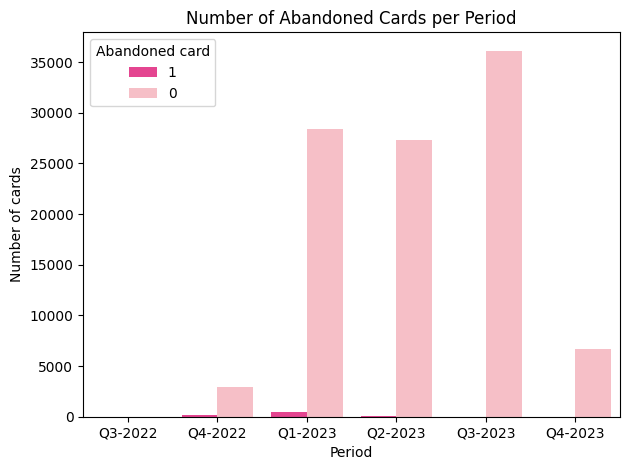

In [ ]:
colors = ['#FE2B8E', '#FFB6C1']

sns.barplot(data=q3_1, x='period_started_at', y='card_number', hue='card_abandoned', palette=colors)
plt.title('Number of Abandoned Cards per Period')
plt.xlabel('Period')
plt.ylabel('Number of cards')
plt.legend(title='Abandoned card')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

💡 Few cards go 90 days or more (a quarter) without being reactivated.

🎯 To combat abandonment, you can talk to customers to understand what success means to them and whether they are achieving this with your product. CSAT and NPS surveys can help in this process.

### 3.2 ‘temporarily blocked’: direct impacts on the operation and recommendations for dealing with this situation

🤔 If a high rate of TEMPORARILY_BLOCKED cards were noticed, the first obvious impact would be on the number of transactions because these cards would not be enabled for this.

My recommendations would be:

* Identify the reasons for the blocking;
* Review the reactivation process to see if there are any blockages;
* Carry out qualitative research with users;

### 3.3 Dealing with a large number of cards expiring in the next quarter

🤔 If a large number of cards are expiring in a given quarter (e.g. Q2-2024) the recommendations would be:

* Ensure that the reactivation process for card exchange is optimized;
* Work together with CRM to contact customers to make them aware of the card's expiry date;
* And monitor card revalidation;